In [1]:
%matplotlib inline 

In [2]:
import mat73
import cv2
import numpy as np
from matplotlib import pyplot as plt

#배열 전체 출력할 때 아래 주석 해제하고 살펴보기
#import sys
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
#매트랩 파일 불러오기
mat_file1 = mat73.loadmat('121.mat', use_attrdict=True) 
mat_file2 = mat73.loadmat('2021.mat', use_attrdict=True) 
mat_file3 = mat73.loadmat('1500.mat', use_attrdict=True) 

In [4]:
#딕셔너리 형식으로 ID, 이미지, 레이블, 종양경계(경계 벡터), 종양영역 정보(True/False)를 담고 있다.
mat_file1

{'cjdata': {'PID': '109968',
  'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
  'label': array(1.),
  'tumorBorder': array([207.32370438, 263.28838531, 199.69215698, 266.46819673,
         195.87638328, 276.64359326, 191.42464729, 281.73129153,
         183.79309989, 288.72687665, 167.89404281, 293.81457491,
         164.71423139, 298.2663109 , 164.07826911, 304.62593373,
         164.71423139, 314.16536798, 167.25808052, 323.06883995,
         168.53000509, 331.33634963, 171.07385422, 339.60385932,
         174.25366564, 341.51174617, 180.61328848, 345.96348215,
         185.06502446, 348.50733128, 190.15272273, 350.41521813,
         193.33253414, 349.77925585, 199.05619469, 352.32310498,
         205.41581753, 355.5029164 , 207.95966666, 355.5029164 ,
         216.22717634, 353.59502955, 227.0

In [5]:
#레이블 별로 이미지 데이터 하나씩 불러오기 
meningioma = mat_file1['cjdata']['image'].astype(np.float64)
glioma = mat_file2['cjdata']['image'].astype(np.float64)
pituitary = mat_file3['cjdata']['image'].astype(np.float64)

In [6]:
#이미지 사이즈, 최대값, 최소값 확인
print("glioma.shape :", glioma.shape, ", glioma.max() :", glioma.max(), ", glioma.min() :", glioma.min())

glioma.shape : (512, 512) , glioma.max() : 4168.0 , glioma.min() : 0.0


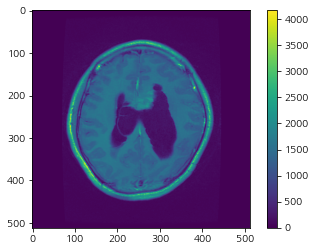

In [7]:
#오른쪽 컬러바로 대충 최대값 확인
plt.figure
plt.imshow(glioma)
plt.colorbar()
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'pituitary tumor')

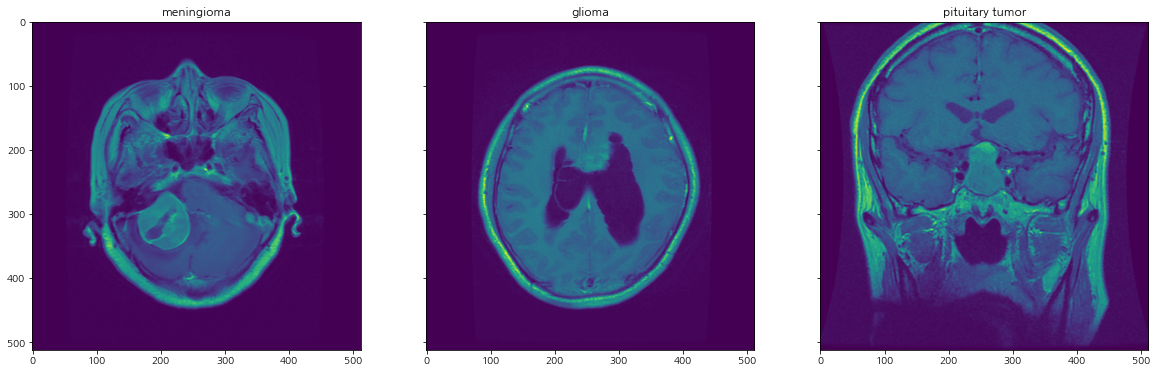

In [8]:
#원본 이미지 plot
fig, ax = plt.subplots(1, 3, figsize=(20,20), sharex=True, sharey=True)

ax[0].imshow(meningioma)
ax[0].set_title('meningioma')

ax[1].imshow(glioma)
ax[1].set_title('glioma')

ax[2].imshow(pituitary)
ax[2].set_title('pituitary tumor')

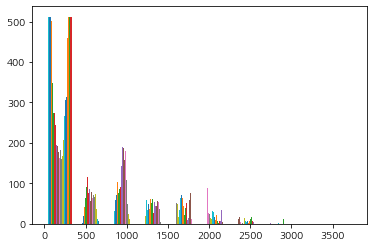

In [9]:
#히스토그램으로 밝기 분포 확인
n, bins, patch = plt.hist(meningioma)

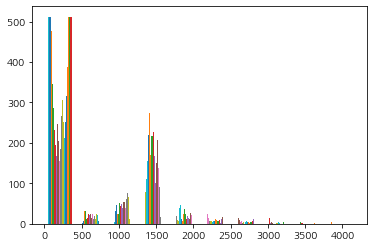

In [10]:
n, bins, patch = plt.hist(glioma)

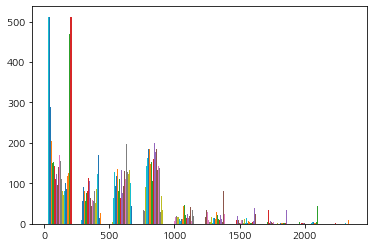

In [11]:
n, bins, patch = plt.hist(pituitary)

Text(0.5, 1.0, 'pituitary tumor')

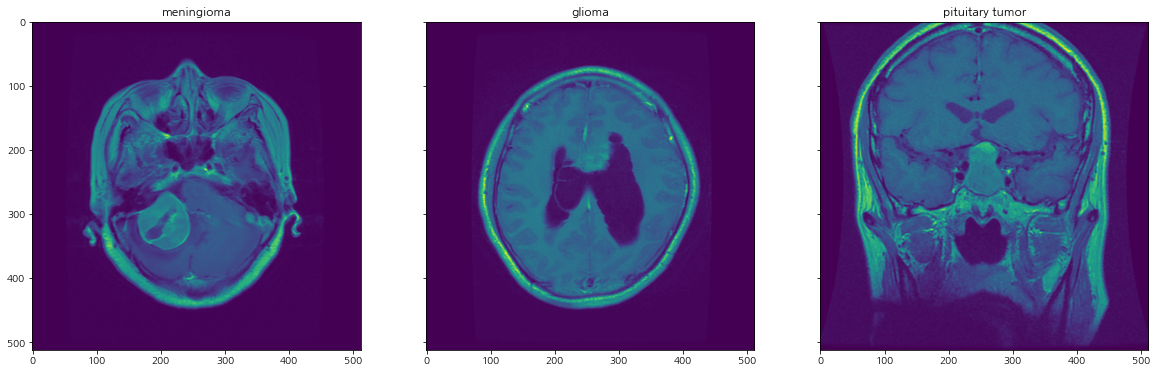

In [12]:
#정규화 과정, cv2.NORM_MINMAX 이거 하면 히스토그램 스트레칭 된대
#고무줄을 늘이듯이 히스토그램을 잡아 펼쳐서 그레이스케일 전 구간에서 히스토그램 그래프가 나타나도록 변환하는 기법이 히스토그램 스트레칭. 
#결과적으로 히스토그램 스트레칭을 수행한 영상은 명암비가 높아져서 일반적으로 보기 좋은 사진 형태로 바뀐다.
meningioma = cv2.normalize(meningioma, None, 0, 255, cv2.NORM_MINMAX)
glioma = cv2.normalize(glioma, None, 0, 255, cv2.NORM_MINMAX)
pituitary = cv2.normalize(pituitary, None, 0, 255, cv2.NORM_MINMAX)

#0~255 정규화와, 히스토그램 스트래칭 된 이미지 plot
fig, ax = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)

ax[0].imshow(meningioma)
ax[0].set_title('meningioma')

ax[1].imshow(glioma)
ax[1].set_title('glioma')

ax[2].imshow(pituitary)
ax[2].set_title('pituitary tumor')

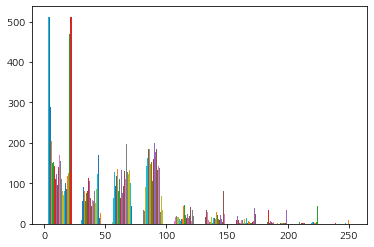

In [14]:
#분포의 최대값이 바뀐 것을 확인
n, bins, patch = plt.hist(pituitary)

In [29]:
#이진화 예제, 오츠 이진화 알고리즘을 활용하였다. 입력 이미지 데이터타입 변경 유의
#retval은 오츠 알고리즘을 통해 자동으로 계산된 임계값이, dst에는 이진화된 이미지가 저장된다. (임계값 기준으로 나뉜 두 분포의 분산을 최소화해주는 임계값을 계속 갱신하며 찾는 원리)
retval, dst = cv2.threshold(pituitary.astype("uint8"), 100, 255, cv2.THRESH_OTSU)
retval

53.0

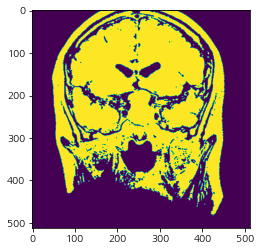

In [30]:
#이진화 된 이미지
plt.imshow(dst)

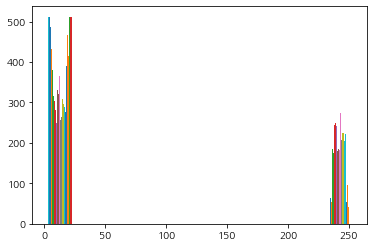

In [51]:
#0 / 255 직선 모양으로 분포할 줄 알았는데 왠지 이상하게 생겼다. 
n, bins, patch = plt.hist(dst)

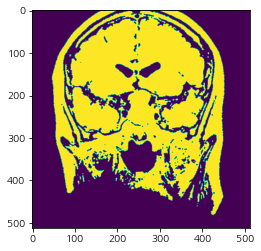

In [33]:
#중간값 필터 적용, 이미지 블러링 기법(노이즈 제거 목적) 중 하나인데, 평균값 필터보다 경계를 잘 보존한다는 장점이 있다.
median = cv2.medianBlur(dst, 3)
plt.imshow(median)

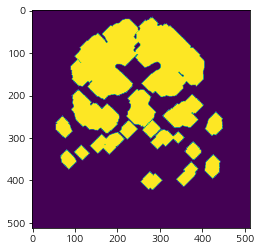

In [50]:
#모폴로지연산 수행, 원리가 어려워 보여서 정확히 이해는 못했다. 뜬끔 없는 결과가 나왔다.

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel, iterations=5)
plt.imshow(dst)

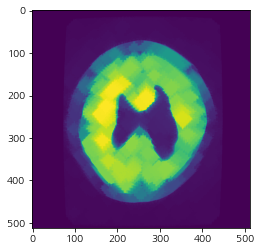

In [53]:
#저기 한가운데 제일 밝은 점이 종양 영역인 걸 감안했을 때, 어떻게 파라미터 조정 잘하면 쓸 수 있을 것도 같은데.. 조정해야 될 파라미터가 많기도 하고 뭘 의미하는지 아직 이해 못 했다.

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (12,12))
dst = cv2.morphologyEx(glioma, cv2.MORPH_OPEN, kernel, iterations=3)
plt.imshow(dst)